### Group-1 Predicting RTC Severity 

**Days of week** column is encoded as     
Wednesday 1 --   Thurday   2  --    Friday    3  --   Saturday  4  --   Sunday    5 ----  Monday    6 ---    Tuesday   7
**InScotland** column is encoded as 
1  Yes  if accident took place   
2  No  if accident did not took place in Scotland

**Urban_or_Rural_Area** Accidents took place in Urban or rural area. Here Urban is indicated by  1 and Rural area is indicated by 2.

**Road_Type** There are diffrent types of roads in Liverpool  where accidents took place 
Dual carriageway  --->    represented  by  1     -----        Single carriageway  -->  represented  by  2
One way street  -->      represented  by  3     -----        Roundabout   --->         represented  by  4
Slip road    -->         represented  by  5

**Weather_Conditions** --
Fine no high winds    = 1 ,  Raining no high winds = 2 , Other = 3 , Snowing no high winds = 4 , Fine + high winds = 5 ,
Raining + high winds = 6 , Fog or mist =7 , Snowing + high winds = 9 ,

**Road_Surface_Conditions**
 Dry  =1 --  Wet or damp = 2 ---  Frost or ice = 3  ----  Snow = 4 --- Flood over 3cm. deep = 5     
**1st_Road_Class**  
 B = 1     ,   C = 2   ,    A = 4     ,     Motorway = 5      ,   A(M) = 6    
**Light_Conditions** There are 5 light conditions
Darkness - lights lit     is  represented by 1   ,    
Darkness - lighting unknown   represented b 2    ,
Darkness - lights unlit    represented by 3      , 
Darkness - no lighting     represented by 4      ,
Daylight       represented by              5  

**Junction_Control**
Auto trafic Signal =1 ,   Give way or uncontrolled = 3   ,   Data missing or out of range = 4   , here 7 and 4 are combined 
somehow  ,   Data missing or out of range = 7

some columns of junction controll are also combined .


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set()
%matplotlib inline

In [2]:
#!pip install pyarrow
#!pip install fastparquet

In [3]:

data=pd.read_parquet( 'accident_data_lgbm_impute.parquet' , engine='auto')
df=data.copy()

In [4]:
df.head()

,Accident_Index,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing
0,200501BS00002,Slight,1.0,450.0,1.0,0.0,3.0,1,1.0,1.0,...,2005,1,0,0,0,1,0,0,1,0
1,200501BS00003,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,4.0,...,2005,1,0,1,0,1,1,0,1,0
2,200501BS00005,Slight,2.0,0.0,1.0,0.0,3.0,3,1.0,4.0,...,2005,1,1,1,0,1,1,0,1,0
3,200501BS00007,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,3.0,...,2005,1,0,1,0,1,0,0,1,0
4,200501BS00010,Slight,4.0,3212.0,3.0,304.0,3.0,4,1.0,1.0,...,2005,1,0,0,0,1,0,0,1,0


In [5]:
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
1st_Road_Class,1037508.000000,2.904169,1.236432,1.000000,2.000000,2.000000,4.000000,6.000000
1st_Road_Number,1037508.000000,1013.592931,1832.805515,0.000000,0.000000,127.000000,712.000000,9999.000000
2nd_Road_Class,1037508.000000,1.463610,1.043125,1.000000,1.000000,1.000000,1.000000,6.000000
2nd_Road_Number,1037508.000000,391.362885,1321.138212,-966.162823,0.000000,0.000000,0.000000,9999.000000
Carriageway_Hazards,1037508.000000,3.353090,0.618913,2.000000,3.000000,3.000000,4.000000,6.000000
Day_of_Week,1037508.000000,4.009791,2.067089,1.000000,2.000000,4.000000,6.000000,7.000000
Did_Police_Officer_Attend_Scene_of_Accident,1037508.000000,1.195872,0.402356,1.000000,1.000000,1.000000,1.000000,3.000000
Junction_Control,1037508.000000,4.266683,2.111060,1.000000,3.000000,3.000000,7.000000,7.000000
Junction_Detail,1037508.000000,3.129189,1.955826,1.000000,2.000000,2.000000,3.000000,9.000000
Latitude,1037508.000000,52.572890,1.423377,49.914430,51.492231,52.345006,53.463615,60.757544


In [6]:
df.dtypes

Accident_Index                                  object
Accident_Severity                               object
1st_Road_Class                                 float64
1st_Road_Number                                float64
2nd_Road_Class                                 float64
2nd_Road_Number                                float64
Carriageway_Hazards                            float64
Day_of_Week                                      int64
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               float64
Junction_Detail                                  int64
Latitude                                       float64
Light_Conditions                                 int64
Local_Authority_(District)                       int64
Local_Authority_(Highway)                        int64
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
LSOA_of_Ac

In [7]:
df.shape

(1037508, 41)

<AxesSubplot:>

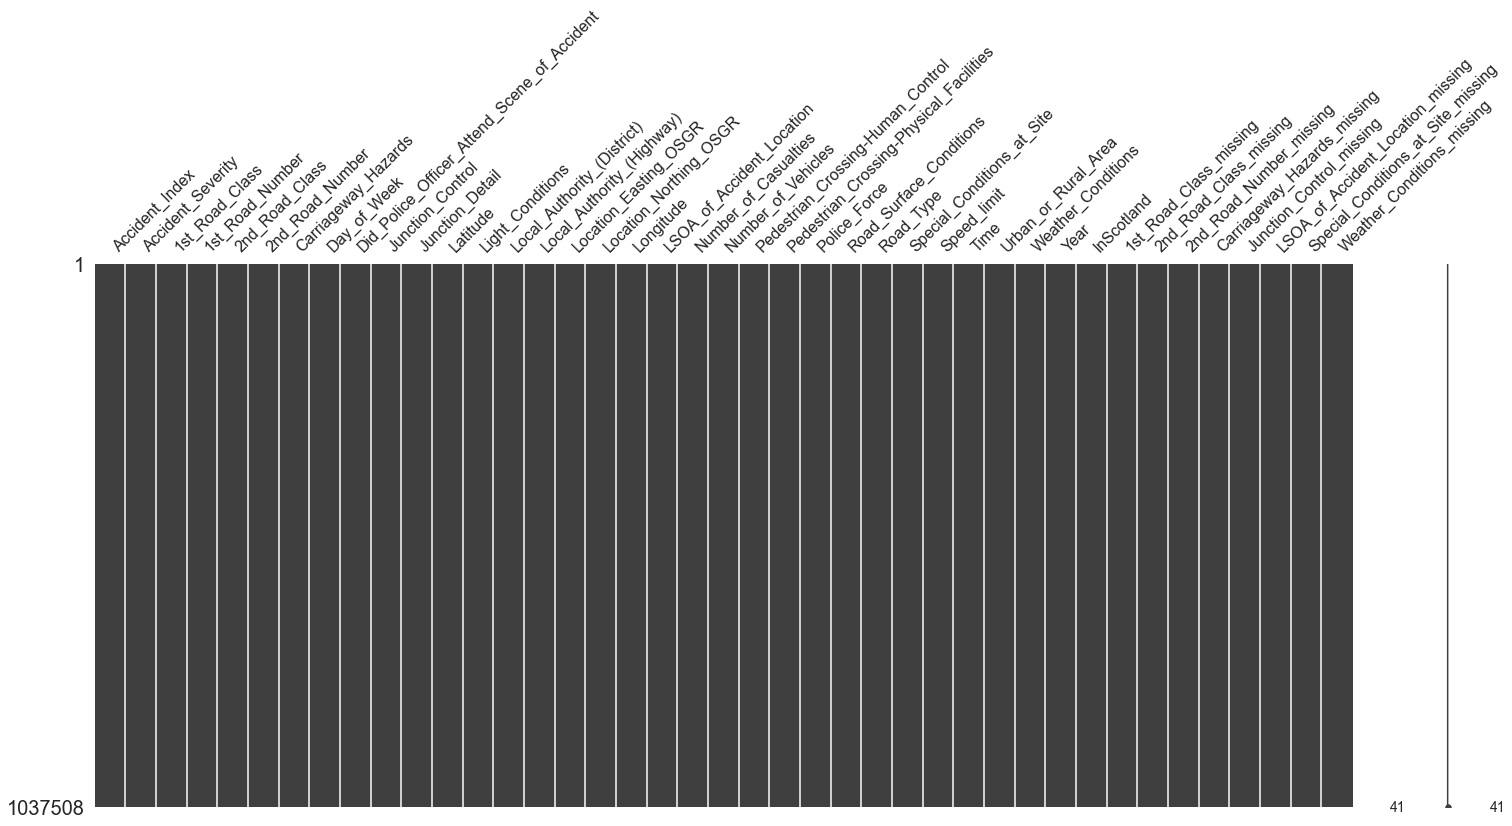

In [8]:
msno.matrix(df)

**Observations** Since Data is clean there are no missing values in the data

### Feature Dstrbution

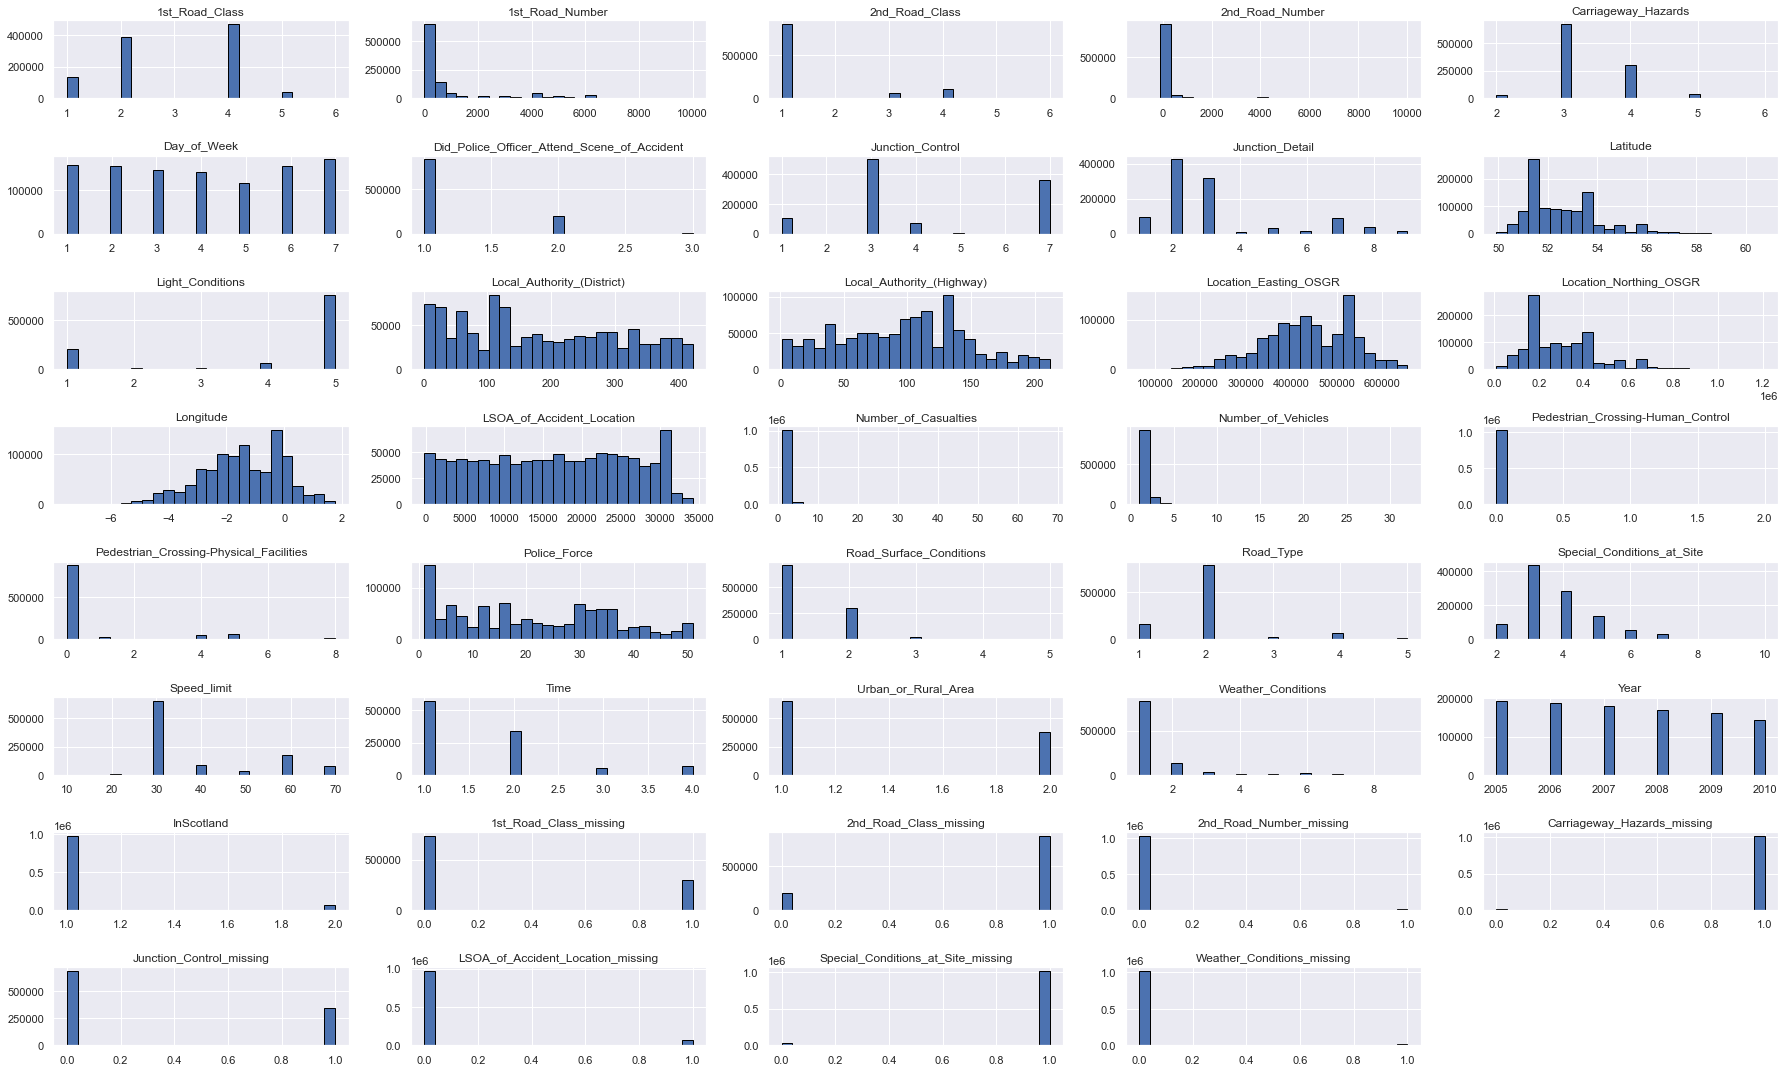

In [9]:
#plt.figure(fogsize=35,10)
#df.hist(bins=50 , density = True , figsize=(35,25) , edgecolor='black' )
#plt.tight_layout()
#plt.show()

df.hist(bins=25, figsize=(25, 15), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

**Observation**
 Data is Skewed

### Accident_Severity

In [11]:
df['Accident_Severity'].value_counts()*100

Slight     88608300
Serious    13699400
Fatal       1443100
Name: Accident_Severity, dtype: int64



Slight     : 886083
Serious    : 136994
Fatal      : 14431


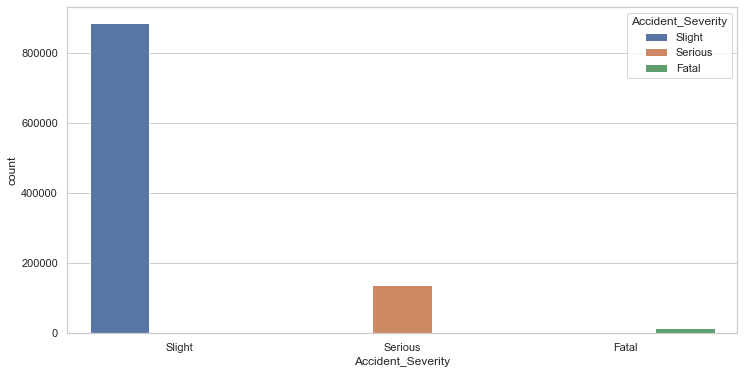

In [12]:

acc_count=df['Accident_Severity'].value_counts()

print('\n')
print('Slight     :',  acc_count[0])
print('Serious    :',  acc_count[1])
print('Fatal      :',  acc_count[2])
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(x='Accident_Severity' , hue='Accident_Severity' , data=df);

#target_value.plot(kind='bar', title='Count (target)');

### Separatting Data of Slight , Serious and Fatal from Accident Severity

In [13]:
df_fatal=df[df['Accident_Severity']=='Fatal']
df_Serious=df[df['Accident_Severity']=='Serious']
df_Slight=df[df['Accident_Severity']=='Slight']

In [14]:
print("\nPercentage of Target Values\n")
df['Accident_Severity'].value_counts()/len(df)*100


Percentage of Target Values



Slight     85.404932
Serious    13.204139
Fatal       1.390929
Name: Accident_Severity, dtype: float64

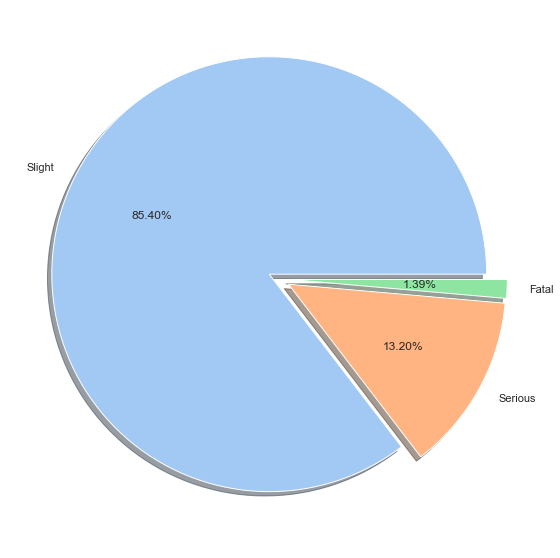

In [15]:
plt.figure(figsize=(20,10))
labels=['Slight' , 'Serious' , 'Fatal']
colors=sns.color_palette('pastel')
plt.pie(df['Accident_Severity'].value_counts() ,labels=labels , autopct='%.2f%%' , shadow= True , colors=colors ,
         explode=[0.05,  0.05 , 0.05]);

### Days of Week Accidents took Place


 Days of week accidents took place are :  [1 2 3 4 5 6 7]


day  1   : 156280
day  2   : 154066
day  3   : 146930
day  4   : 140785
day  5   : 114944
day  6   : 154393
day  7   : 170110


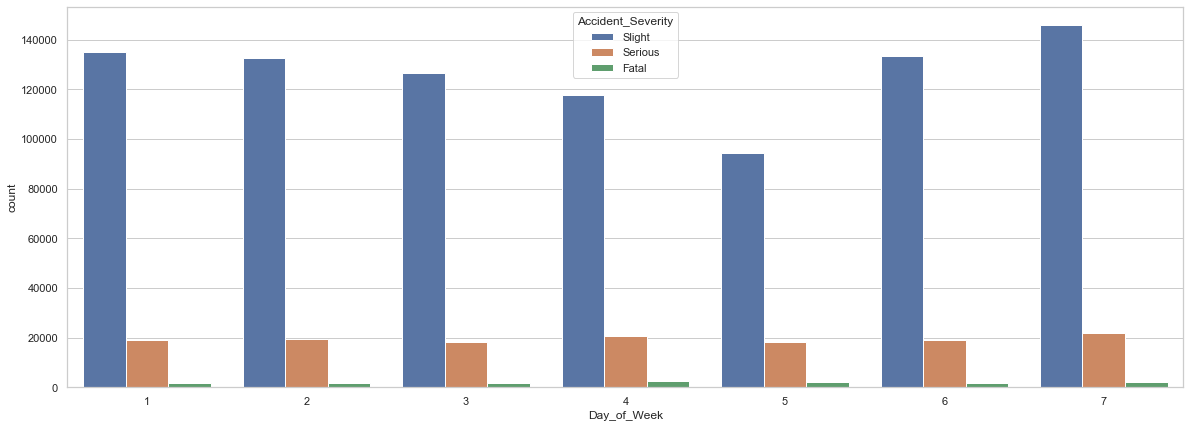

In [16]:
print("\n Days of week accidents took place are : " , df['Day_of_Week'].unique() )

week_value_count=df['Day_of_Week'].value_counts()
print('\n')
print('day  1   :',  week_value_count[1])
print('day  2   :',  week_value_count[2])
print('day  3   :',  week_value_count[3])
print('day  4   :',  week_value_count[4])
print('day  5   :',  week_value_count[5])
print('day  6   :',  week_value_count[6])
print('day  7   :',  week_value_count[7])

plt.figure(figsize=(20,7))
sns.set_theme(style="whitegrid")
sns.countplot(x='Day_of_Week'  ,  hue= 'Accident_Severity', data=df);

**Obseravtions**
From the graph it is seen that most of the accidents took place at day # 7  that is Tuesday and also mostly serious accidents took place 
on that day as compared to other days.

### Days of week when only  Serious and Fatal Accidents Took Place 

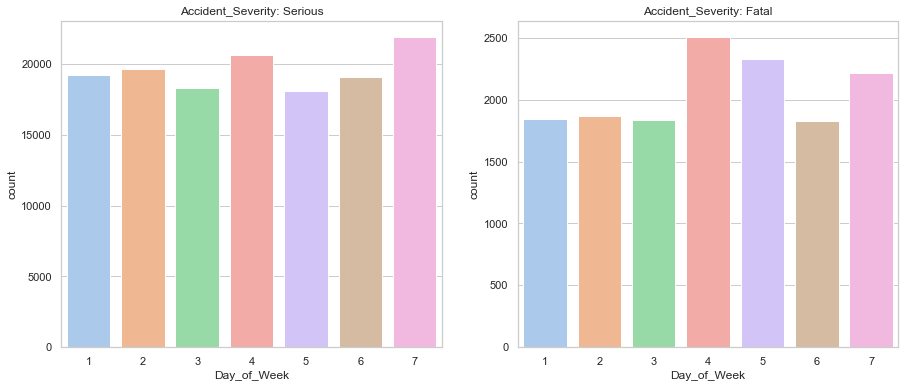

In [17]:
fig, ax= plt.subplots(nrows=1 , ncols=2 , figsize=(15,6))
#sns.countplot(x='Day_of_Week' ,hue='Accident_Severity'  ,palette="plasma" ,  data=df_Serious , ax=ax[0]);
sns.countplot(x='Day_of_Week'  ,  data=df_Serious , palette="pastel" , ax=ax[0]).set(title=f"Accident_Severity: Serious");
sns.countplot(x='Day_of_Week'  ,  data=df_fatal , palette="pastel" ,ax=ax[1]).set(title=f"Accident_Severity: Fatal");


**Observation on Fatal Accidents Data** Most of the Fatal Accidents took place on Saturday ie, encoded as 4  and Sunday encoded as 5

**Observation on Serious Accidents Data**  Most Serious Accidents took place on Tuesday , ie, Day 7 

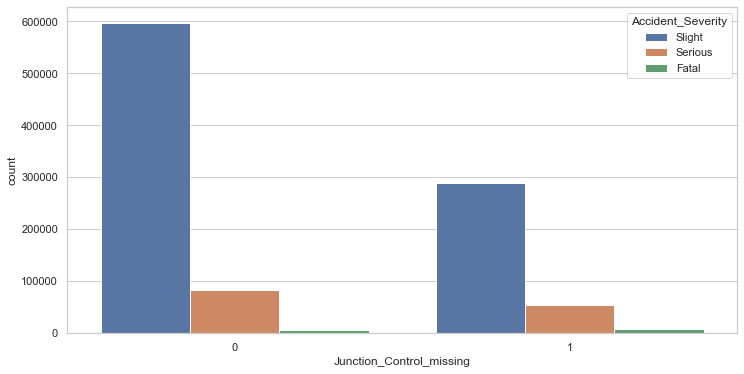

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='Junction_Control_missing'  ,hue= 'Accident_Severity' ,  data=df);

### Accident Distribution According to Year

Accidents in Year 2005 :  194566
Accidents in Year 2006 :  187623
Accidents in Year 2007 :  180292
Accidents in Year 2008 :  168924
Accidents in Year 2009 :  162463
Accidents in Year 2010 :  143640


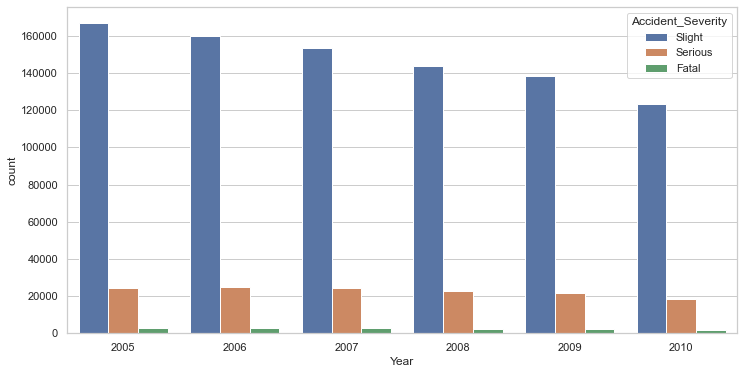

In [19]:
year_count=df['Year'].value_counts()

print( "Accidents in Year 2005 : "  ,  year_count[2005] )
print( "Accidents in Year 2006 : "  ,  year_count[2006] )
print( "Accidents in Year 2007 : "  ,  year_count[2007] )
print( "Accidents in Year 2008 : "  ,  year_count[2008] )
print( "Accidents in Year 2009 : "  ,  year_count[2009] )
print( "Accidents in Year 2010 : "  ,  year_count[2010] )

plt.figure(figsize=(12,6))
sns.countplot(x='Year' , hue='Accident_Severity' ,  data=df);


###  Road Class and Accident Severity

**Ist_Road_Class**

Ist Road Class 1 : 136931
Ist Road Class 2 : 386737
Ist Road Class 4 : 469170
Ist Road Class 5 : 42006
Ist Road Class 6 : 2664


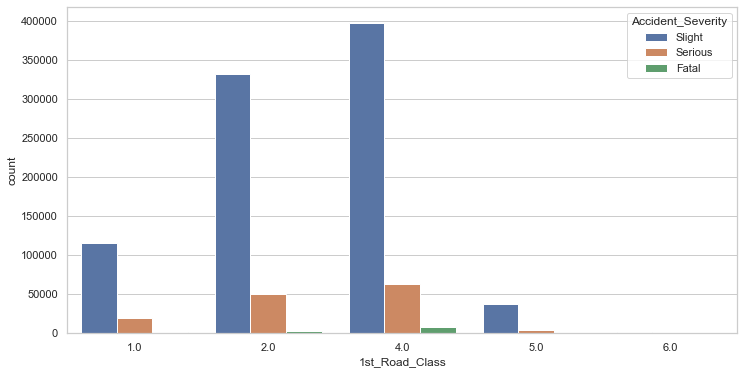

In [20]:
Ist_Road_Class_Counts=df['1st_Road_Class'].value_counts()

print('Ist Road Class 1 :',  Ist_Road_Class_Counts[1])
print('Ist Road Class 2 :',  Ist_Road_Class_Counts[2])
print('Ist Road Class 4 :',  Ist_Road_Class_Counts[4])
print('Ist Road Class 5 :',  Ist_Road_Class_Counts[5])
print('Ist Road Class 6 :',  Ist_Road_Class_Counts[6])

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.countplot(x='1st_Road_Class'  , hue='Accident_Severity' , data=df);

#### Observation
**1st_Road_Class**
B = 1 , C = 2 , A = 4 , Motorway = 5 , A(M) = 6
Here most of the accidents took place on Ist_Road_Class 4.0 That is labelled as A type . More tahn 45000 accidents took place on claas A , then Class type C that is represented by 2 , then Class B and least on Motorway Road class. And the road A(M) shown by number 6 did not have any accident. These are the findings according to the data provided.

In [21]:
df.groupby('Accident_Severity')['1st_Road_Class'].mean()

Accident_Severity
Fatal      3.148153
Serious    2.873535
Slight     2.904932
Name: 1st_Road_Class, dtype: float64

**2nd_Road_Class**

In [22]:
df.groupby('Accident_Severity')['2nd_Road_Class'].mean()

Accident_Severity
Fatal      1.229645
Serious    1.346877
Slight     1.485468
Name: 2nd_Road_Class, dtype: float64


2nd Road Class 1 : 858888
2nd Road Class 3 : 63391
2nd Road Class 4 : 107490
2nd Road Class 5 : 6948
2nd Road Class 6 : 791


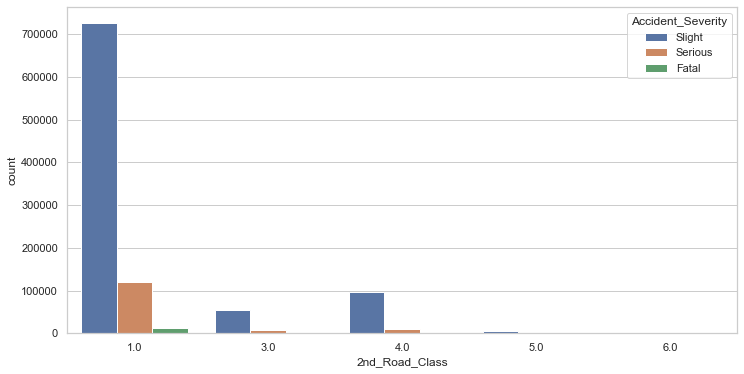

In [23]:
second_Road_Class_Counts=df['2nd_Road_Class'].value_counts()

print('\n2nd Road Class 1 :',  second_Road_Class_Counts[1])
print('2nd Road Class 3 :',  second_Road_Class_Counts[3])
print('2nd Road Class 4 :',  second_Road_Class_Counts[4])
print('2nd Road Class 5 :',  second_Road_Class_Counts[5])
print('2nd Road Class 6 :',  second_Road_Class_Counts[6])

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.countplot(x='2nd_Road_Class'  , hue='Accident_Severity' , data=df);

In [24]:
# Inscotland deleted accidently

### Accidents Distributions with respect to " Did_Police_Officer_Attend_Scene_of_Accident"


Did_Police_Officer_Attend_Scene_of_Accident Class 1 :   836563
Did_Police_Officer_Attend_Scene_of_Accident Class 2 :   198671
Did_Police_Officer_Attend_Scene_of_Accident Class 3 :   2274


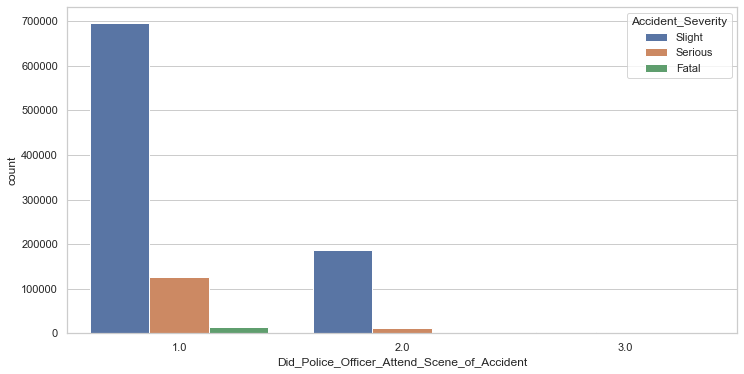

In [25]:

attended_accident = df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

print("\nDid_Police_Officer_Attend_Scene_of_Accident Class 1 :  ", attended_accident[1] )
print("Did_Police_Officer_Attend_Scene_of_Accident Class 2 :  ", attended_accident[2] )
print("Did_Police_Officer_Attend_Scene_of_Accident Class 3 :  ", attended_accident[3] )

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.countplot(x='Did_Police_Officer_Attend_Scene_of_Accident', hue="Accident_Severity" , data=df);

In [26]:
df['Special_Conditions_at_Site_missing'].value_counts()

1    1010805
0      26703
Name: Special_Conditions_at_Site_missing, dtype: int64

In [27]:
df.groupby('Special_Conditions_at_Site_missing').mean()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,...,Weather_Conditions,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Weather_Conditions_missing
Special_Conditions_at_Site_missing,,,,,,,,,,,,,,,,,,,,,
0,3.043441,992.457552,1.449200,326.477415,2.636970,3.973973,1.146912,4.707636,2.971763,52.670252,...,1.512339,2007.332135,1.068794,0.23473,0.821443,0.006516,0.930420,0.432685,0.081152,0.012620
1,2.900490,1014.151276,1.463991,393.077001,3.372008,4.010737,1.197166,4.255034,3.133348,52.570318,...,1.361501,2007.335521,1.059322,0.29152,0.811312,0.010371,0.982585,0.334682,0.067862,0.018563


In [28]:
df['Carriageway_Hazards'].value_counts()

3.0    667432
4.0    297362
5.0     42226
2.0     26736
6.0      3752
Name: Carriageway_Hazards, dtype: int64


claas 2  :  26736
claas 3  :  667432
claas 4  :  297362
claas 5  :  42226
claas 6  :  3752


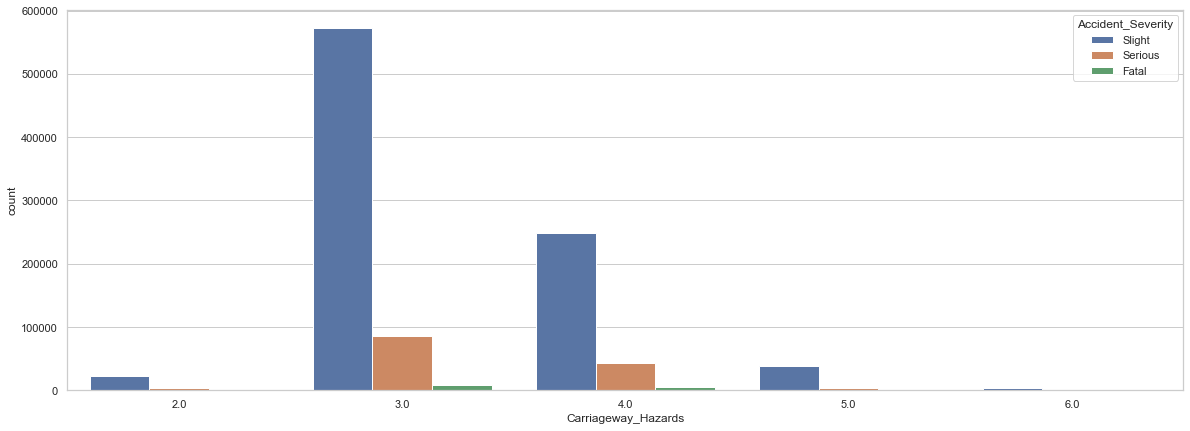

In [29]:
carriage_values = df['Carriageway_Hazards'].value_counts()

print("\nclaas 2  : " ,carriage_values[2])
print("claas 3  : " ,carriage_values[3])
print("claas 4  : " ,carriage_values[4])
print("claas 5  : " ,carriage_values[5])
print("claas 6  : " ,carriage_values[6])

plt.figure(figsize=(20,7))
sns.countplot(x='Carriageway_Hazards' ,hue='Accident_Severity' , data=df);

### Time Feature

In [30]:

df['Time'] = pd.to_datetime(df['Time'], format='%H')
df['Hour'] = df['Time'].apply(lambda x:x.hour)

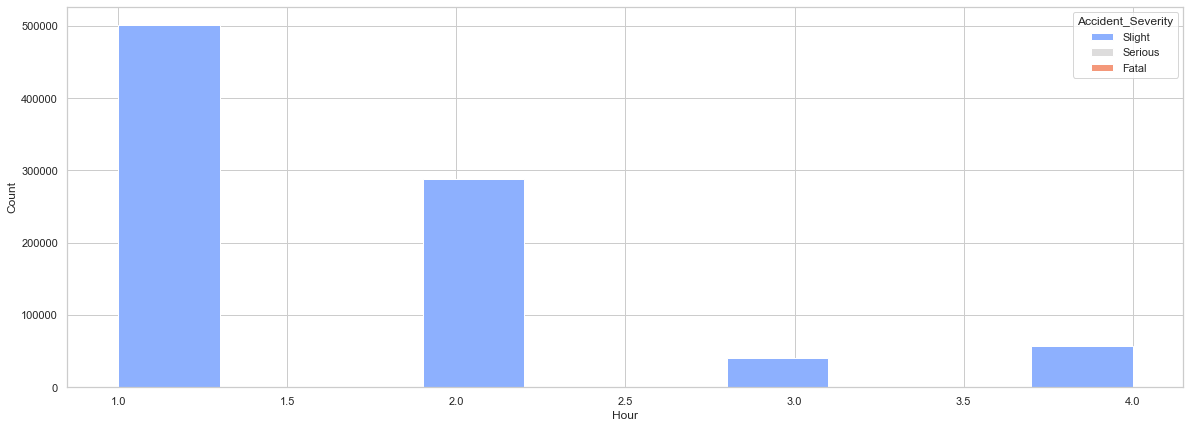

In [31]:
plt.figure(figsize=(20, 7))
sns.histplot(df, x="Hour", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=10);

In [32]:
df['Road_Surface_Conditions'].value_counts()

1    704836
2    300093
3     23727
4      7405
5      1447
Name: Road_Surface_Conditions, dtype: int64

 Road_Surface_Conditions  Dry                 : 704836
 Road_Surface_Conditions  Wet or Damp         : 300093
 Road_Surface_Conditions  Frost or Ice        : 23727
 Road_Surface_Conditions  Snow                : 7405
 Road_Surface_Conditions  Flood over 3cm.deep : 1447


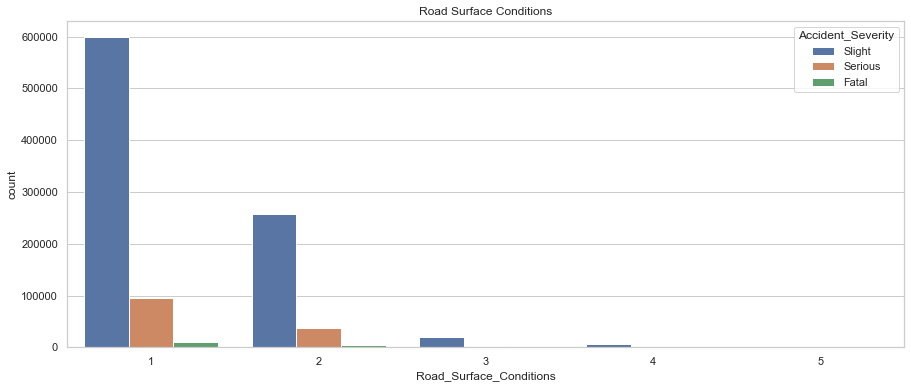

In [33]:
Road_Conditions_counts = df['Road_Surface_Conditions'].value_counts()

print(" Road_Surface_Conditions  Dry                 :",Road_Conditions_counts[1] )
print(" Road_Surface_Conditions  Wet or Damp         :",Road_Conditions_counts[2] )
print(" Road_Surface_Conditions  Frost or Ice        :",Road_Conditions_counts[3] )
print(" Road_Surface_Conditions  Snow                :",Road_Conditions_counts[4] )
print(" Road_Surface_Conditions  Flood over 3cm.deep :" ,Road_Conditions_counts[5] )

plt.figure(figsize=(15,6))
sns.countplot(x='Road_Surface_Conditions' , hue='Accident_Severity', data=df);
#plt.xlabel('Dry=1 , Wet=2, Frost=3 , Snow=4 ,Flood=5');
plt.title('Road Surface Conditions');

### Number of Casualities 

**Observation**
From seeing above casualities,its clear that people travelled travelled solo those have more accidents , whereas who travelled 
in groups have less accidents and those who travelled groups of  in 3 and 4 and 5 had less number of accidents. Whereas the 
people who travelled in groups of 6 and 7 , there was no one who alive.

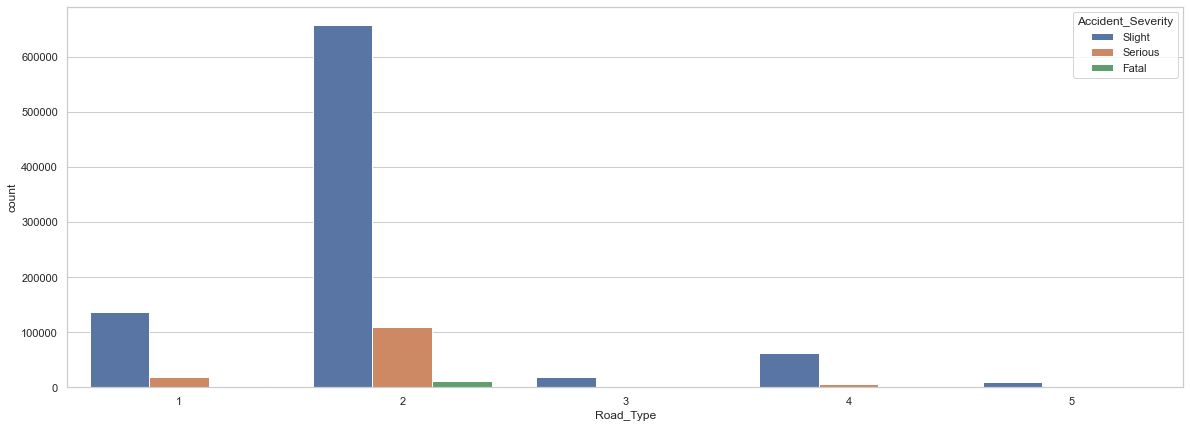

In [34]:
plt.figure(figsize=(20,7))

sns.countplot(x='Road_Type' , hue='Accident_Severity', data=df);

In [35]:
df.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].value_counts(normalize=True).reset_index(name='Percent')

,Urban_or_Rural_Area,Number_of_Casualties,Percent
0,1,1,0.800238
1,1,2,0.142994
2,1,3,0.036928
3,1,4,0.012627
4,1,5,0.004503
...,...,...,...
61,2,45,0.000003
62,2,47,0.000003
63,2,48,0.000003
64,2,62,0.000003


### Discovering Features of Rural Urban Areas and some Features related to Road

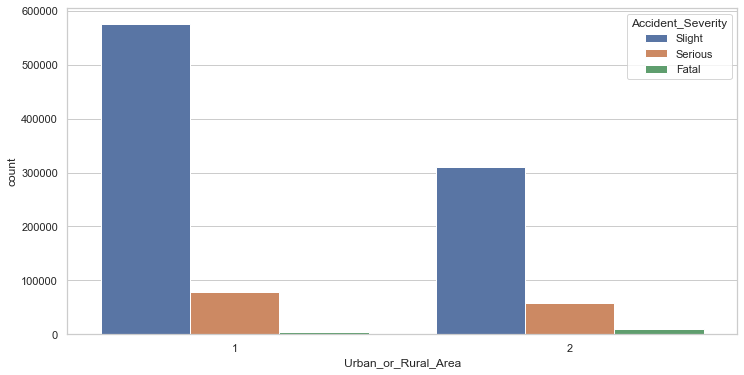

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='Urban_or_Rural_Area'  , hue='Accident_Severity' , data=df );
# urban area 1 and rural area 2 

 
Accidents took place in Urban Area   Class 1 :  659720
Accidents took place in Rural Area   Class 2 : 377788


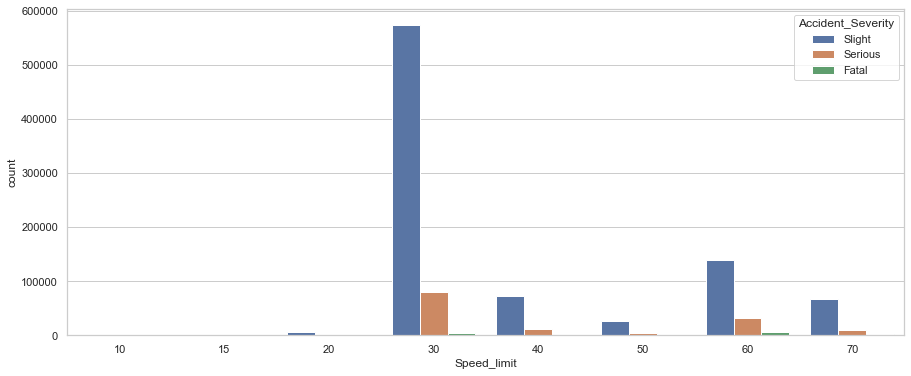

In [37]:
urban_rural_counts=df['Urban_or_Rural_Area'].value_counts()
print(" \nAccidents took place in Urban Area   Class 1 : " , urban_rural_counts[1])
print("Accidents took place in Rural Area   Class 2 :"     ,     urban_rural_counts[2])

plt.figure(figsize=(15,6))
sns.countplot(x=df["Speed_limit"] , hue ="Accident_Severity" , data=df);

### Accident Analysis  In Urban_or_Rural_Area by Speed

Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  : 10
Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  : 15
Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  : 7024
Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  : 659059
Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  : 85744
Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  : 30756
Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  : 175892
Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  : 79008


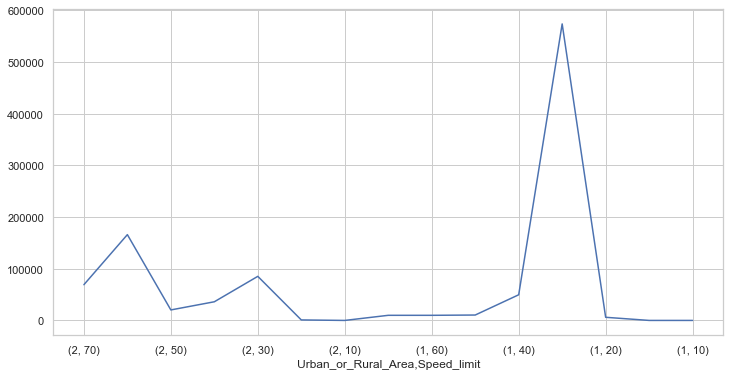

In [38]:
speed_count = df['Speed_limit'].value_counts()

print("Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  :" ,speed_count[10] )   
print("Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  :"  ,speed_count[15] )
print("Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  :"  ,speed_count[20] )
print("Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  :"  ,speed_count[30] )
print("Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  :"  ,speed_count[40] )
print("Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  :"  ,speed_count[50] )
print("Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  :"  ,speed_count[60] )
print("Speed Limit ( Urban_Area Class 1 or Rural_Area Class 2 )  :"  ,speed_count[70] )

plt.figure(figsize=(12,6))

figure=df.groupby('Urban_or_Rural_Area')['Speed_limit'].value_counts().sort_index(ascending = False).plot();



**Observation**  
1. Most of the accidents took place in Urban Area at speed 30
2. In Rural area most of the accident took place at speed 60

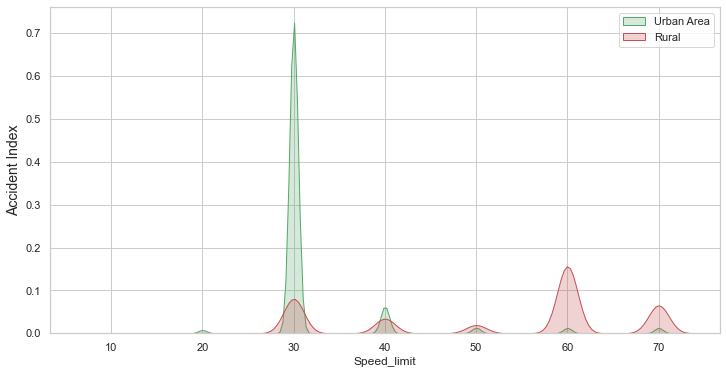

In [39]:

plt.figure(figsize=(12,6))

sns.kdeplot(df[df['Urban_or_Rural_Area'] == 1]['Speed_limit'].dropna() , shade=True , color='g', label="Urban Area" );
sns.kdeplot(df[df['Urban_or_Rural_Area'] == 2]['Speed_limit'].dropna(), shade=True,  color='r', label="Rural");
plt.ylabel("Accident Index" , fontsize=14)
plt.legend();

### Maximum Casualities on  Road Type Took Place 

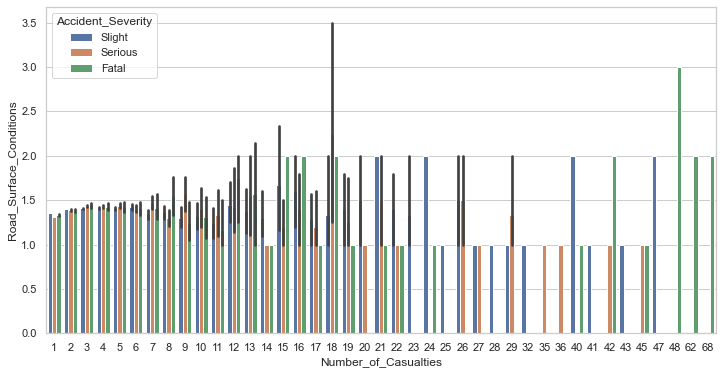

In [40]:
plt.figure(figsize=(12,6))

sns.barplot(x='Number_of_Casualties' , y='Road_Surface_Conditions' ,hue= "Accident_Severity", data=df );
#sns.kdeplot(x=df['Number_of_Casualties'],y=df['Road_Surface_Conditions'] , shade=True, color='g')
#sns.kdeplot(x=df['Road_Surface_Conditions'],shade=True, color='b')

### Maximum Serious and Fatal Casualities took place on Road Type

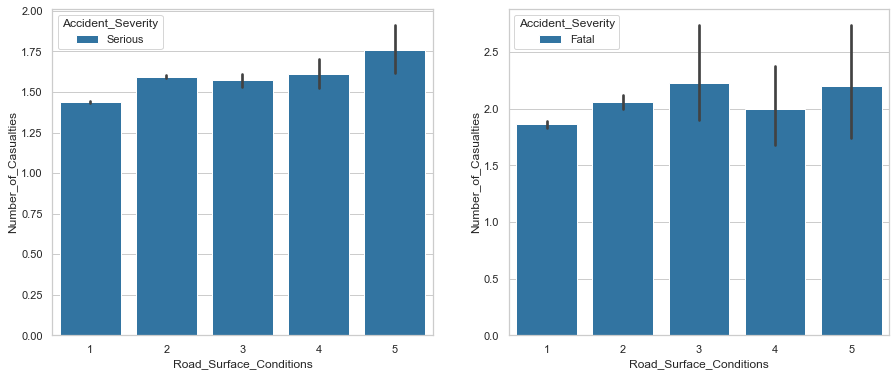

In [41]:
fig, ax= plt.subplots(nrows=1 , ncols=2 , figsize=(15,6))
#sns.countplot(x='Day_of_Week' ,hue='Accident_Severity'  ,palette="plasma" ,  data=df_Serious , ax=ax[0]);
sns.barplot(x='Road_Surface_Conditions' , y="Number_of_Casualties" , hue='Accident_Severity', palette="tab10"  , data=df_Serious , ax=ax[0]);
sns.barplot(x='Road_Surface_Conditions' ,y="Number_of_Casualties",hue='Accident_Severity', palette="tab10" , data=df_fatal , ax=ax[1]);


**Obsevation**
The most fatal accidents took place on Road class 1 and road class 2 

### Weather Condition 

weather condition : class 1  80.91127972025276
weather condition : class 2 12.326941093466267
weather condition : class 3  2.5344382886686176
weather condition : class 4  0.8224514895306831
weather condition : class 5  1.2972430092105314
weather condition : class 6 1.4054831384432698
weather condition : class 7  0.5792726417531239
weather condition : class 9  0.12289061867474757


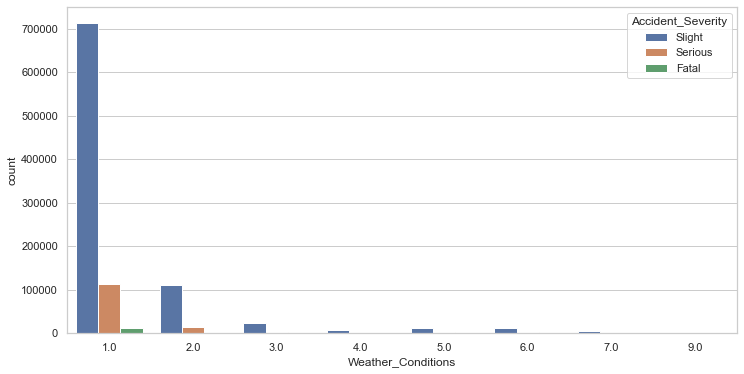

In [42]:
weather_condition_count=df['Weather_Conditions'].value_counts()/len(df)*100 
print("weather condition : class 1 ",weather_condition_count[1] )
print("weather condition : class 2",weather_condition_count[2] )
print("weather condition : class 3 ",weather_condition_count[3] )
print("weather condition : class 4 ",weather_condition_count[4] )
print("weather condition : class 5 ",weather_condition_count[5] )
print("weather condition : class 6",weather_condition_count[6] )
print("weather condition : class 7 ",weather_condition_count[7] )
print("weather condition : class 9 ",weather_condition_count[9] )
plt.figure(figsize=(12,6))
sns.countplot(x='Weather_Conditions' , hue='Accident_Severity',  data = df);

The graph shows that mostly 81%  accidents occur when weather is fine indicated by number 1 and 12 % when weather is normal shown by number 2 ie, weather is 
rainy but no high winds . the number 3, 4 , 5 shows cold weather and less number of accidents comparatively while 7 shows fog  and 6, and 9 shows stormy weather and 
not more accidents because in such weather people avoid to go outside and remain in their houses.

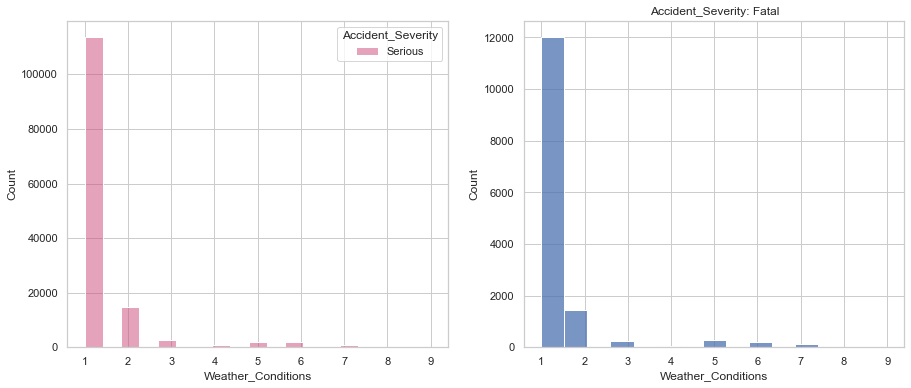

In [43]:
fig, ax= plt.subplots(nrows=1 , ncols=2 , figsize=(15,6))
sns.histplot(x='Weather_Conditions' ,hue='Accident_Severity'  ,palette="plasma" ,  data=df_Serious , ax=ax[0]);
sns.histplot(x='Weather_Conditions' ,palette="tab10" ,  data=df_fatal , ax=ax[1]).set(title=f"Accident_Severity: Fatal");

In [44]:
df_weather_casual= df.groupby('Weather_Conditions')['Number_of_Casualties'].value_counts(normalize=True).reset_index(name='Percent')

##### Here Below I am dropping Some Features and viewing other Important Features Relation  

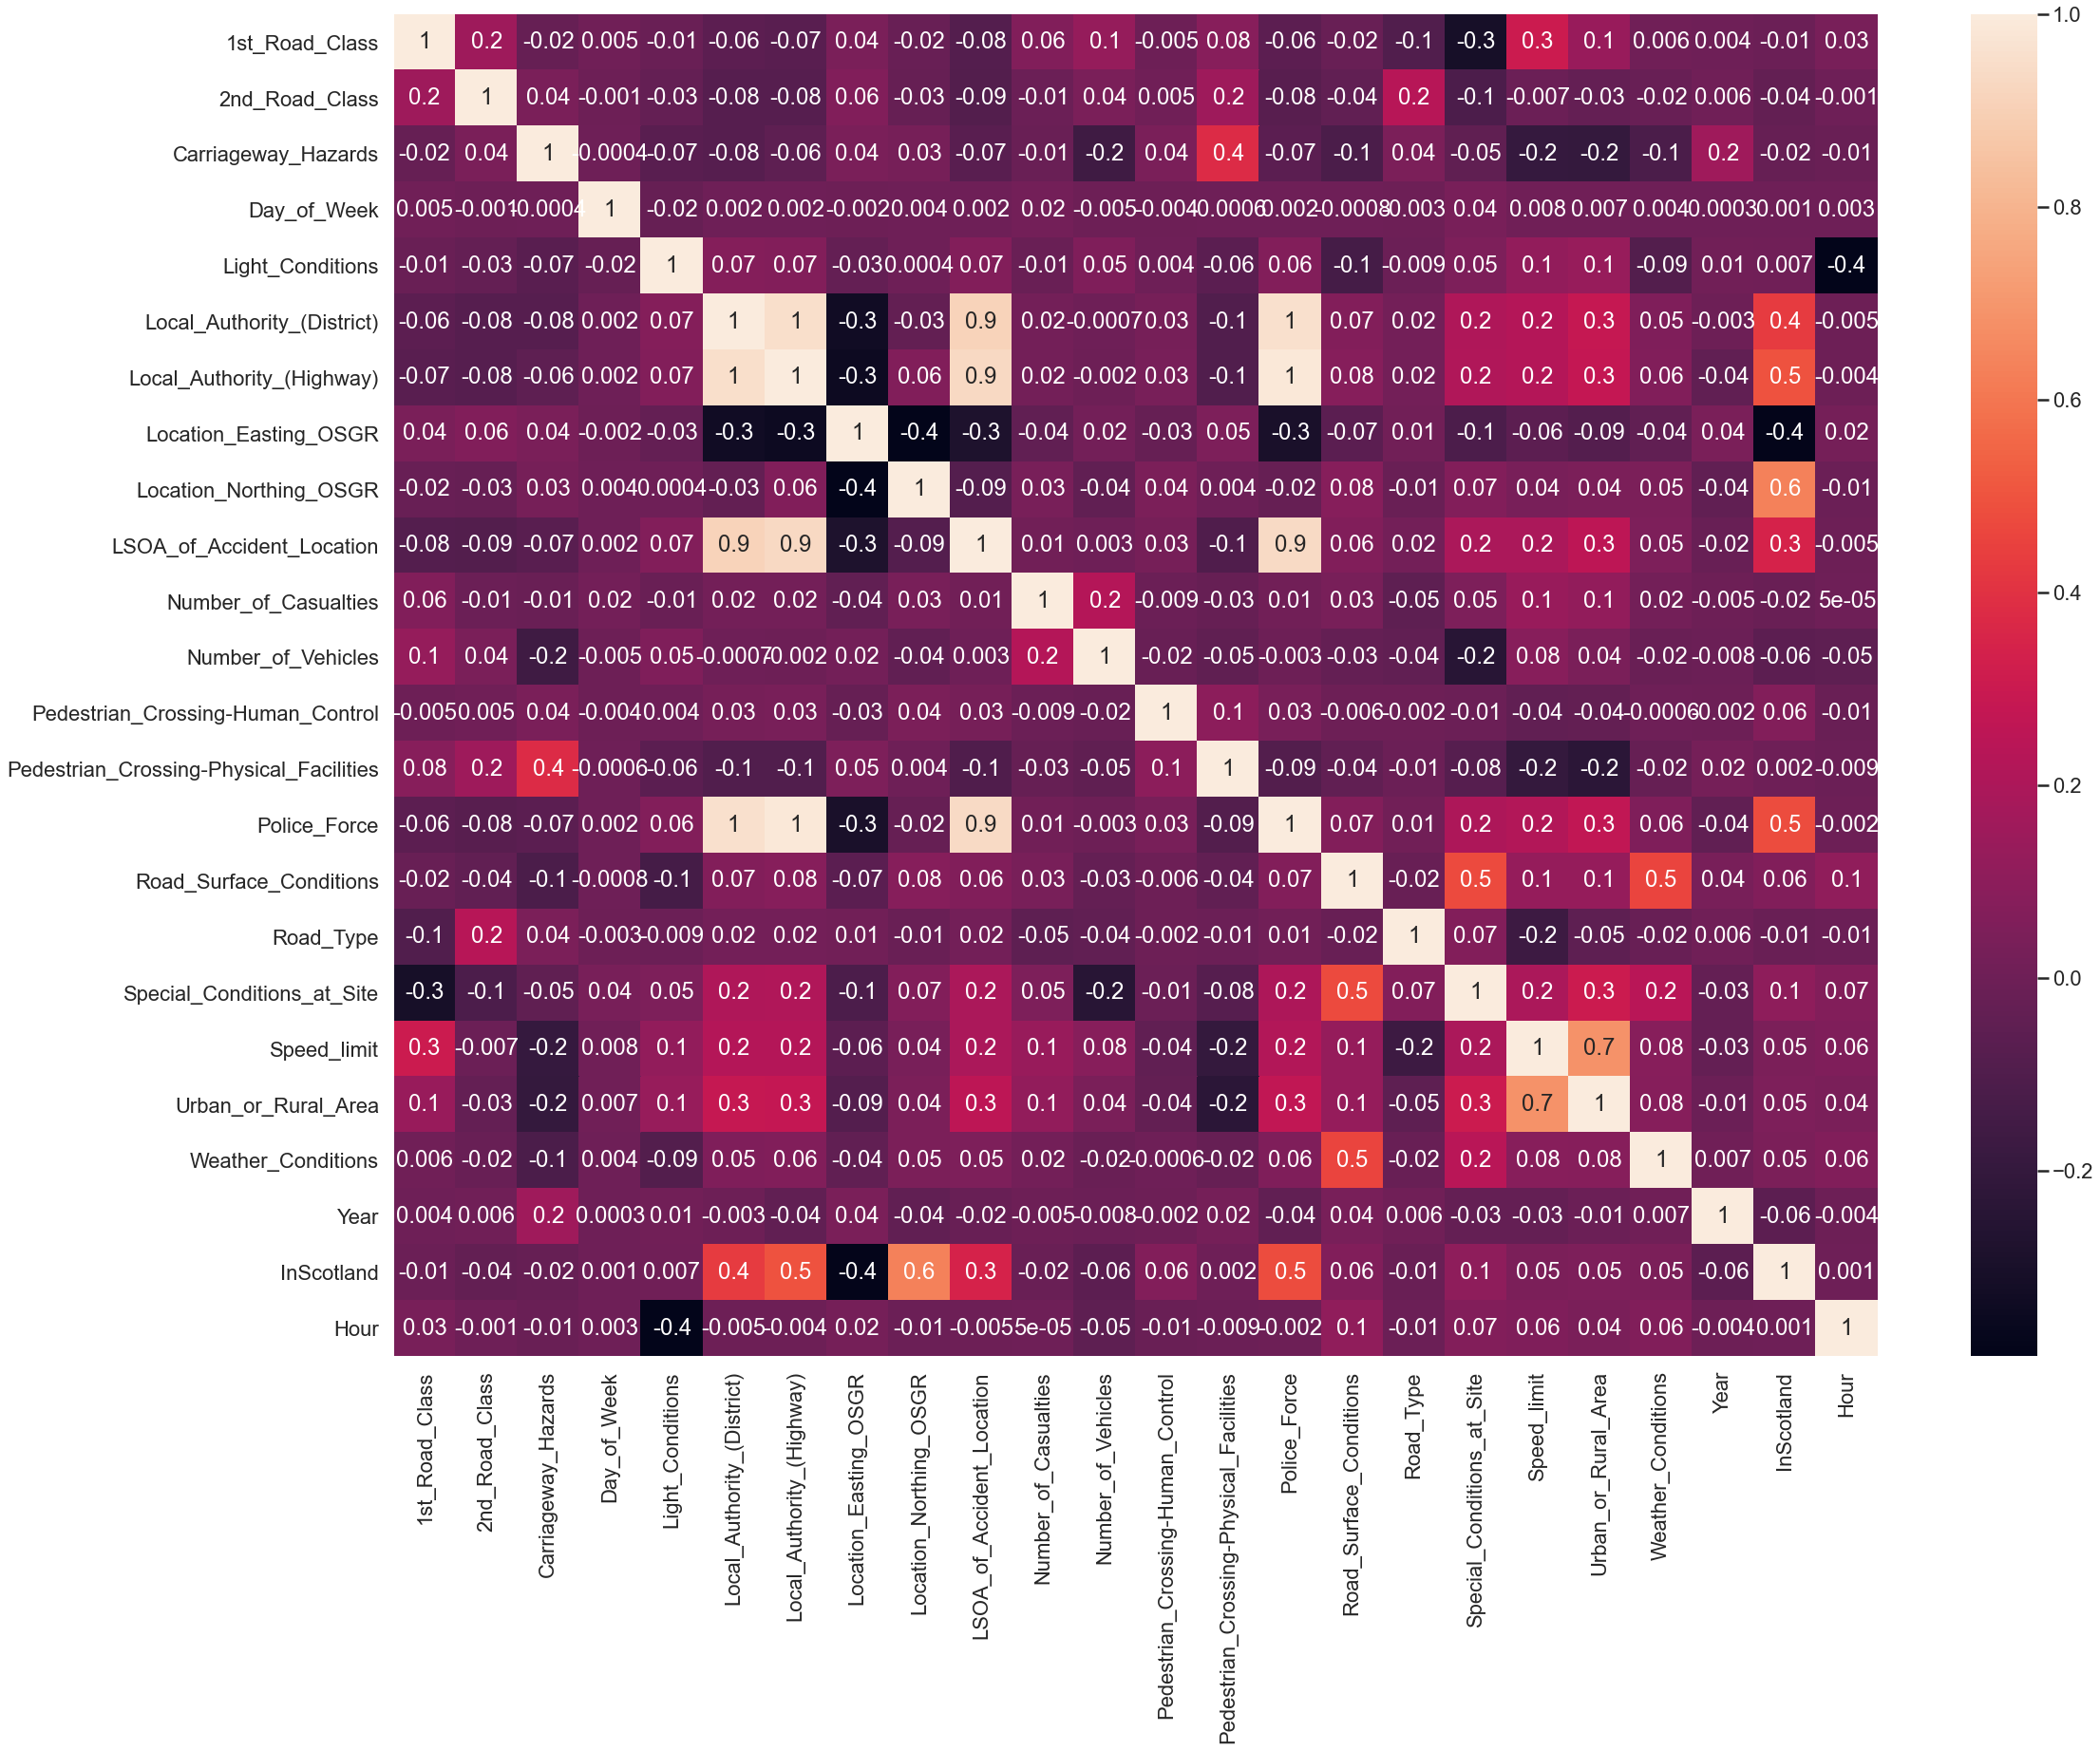

In [48]:
df_my=df.drop([ '1st_Road_Number', '2nd_Road_Number','1st_Road_Class_missing','2nd_Road_Class_missing','2nd_Road_Number_missing',
       'Carriageway_Hazards_missing','Longitude',
       'LSOA_of_Accident_Location_missing','Special_Conditions_at_Site_missing','Weather_Conditions_missing','Junction_Control_missing',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control',
       'Junction_Detail', 'Latitude' ],  axis=1)


sns.set_context('poster')
plt.figure(figsize=(35,26))
cor = df_my.drop('Accident_Index',axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

### 1st Road Class

In [49]:
df1=df[df['1st_Road_Class']==1]['1st_Road_Number'] 
df2=df[df['1st_Road_Class']==3]['1st_Road_Number'] 
df4=df[df['1st_Road_Class']==4]['1st_Road_Number']
df5=df[df['1st_Road_Class']==5]['1st_Road_Number']
df6=df[df['1st_Road_Class']==6]['1st_Road_Number']
df7=df[df['1st_Road_Class']==0]['1st_Road_Number']
#plt.tight_layout()

In [50]:
def draw_histogram(data, ax, title):
    sns.histplot(x=data, bins=50, ax=ax).set(title=f"Road Class - {title}");

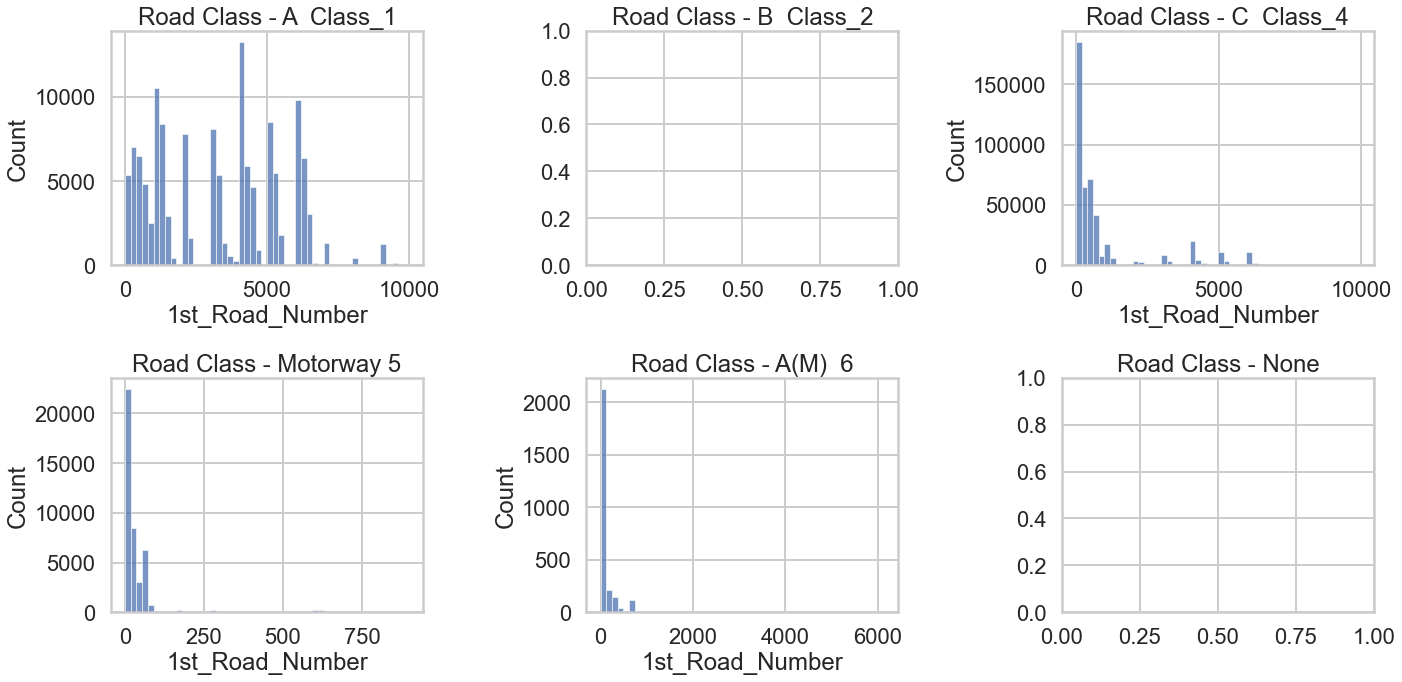

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax = ax.flatten()

draw_histogram(df1, ax[0], "A  Class_1")
draw_histogram(df2, ax[1], "B  Class_2")
draw_histogram(df4, ax[2], "C  Class_4")
draw_histogram(df5, ax[3], "Motorway 5")
draw_histogram(df6, ax[4], "A(M)  6")
draw_histogram(df7, ax[5], "None")

plt.tight_layout()

### 2nd Road Class

In [52]:
df_a=df[df['2nd_Road_Class']==1]['2nd_Road_Number'] 
df_b=df[df['2nd_Road_Class']==3]['2nd_Road_Number']
df_c=df[df['2nd_Road_Class']==4]['2nd_Road_Number']
df_m=df[df['2nd_Road_Class']==5]['2nd_Road_Number']
df_am=df[df['2nd_Road_Class']==6]['2nd_Road_Number'] 
df_b

4           304.0
5           325.0
28          415.0
87          412.0
107         450.0
            ...  
1037401    9174.0
1037402     817.0
1037431    9052.0
1037435    9055.0
1037501    9152.0
Name: 2nd_Road_Number, Length: 63391, dtype: float64

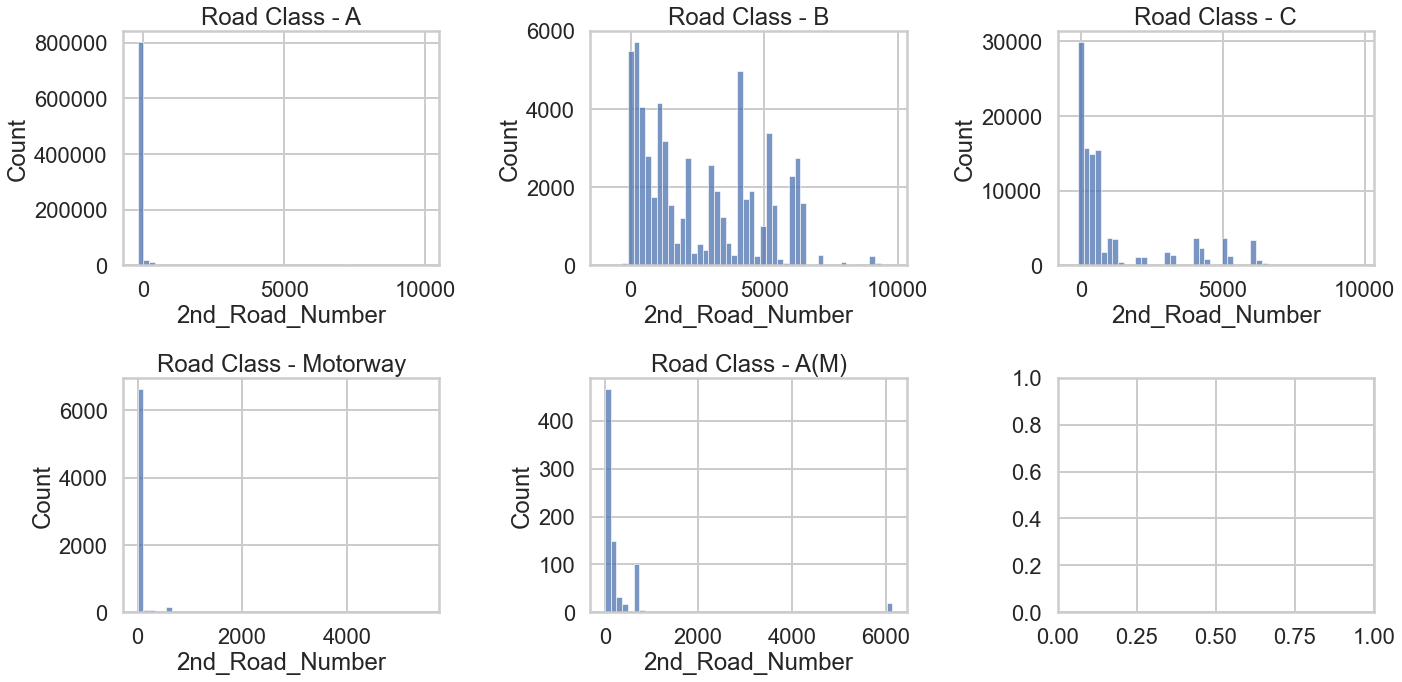

In [53]:
fig, ax=plt.subplots(nrows=2 , ncols=3 , figsize=(20,10))
ax = ax.flatten()

draw_histogram(df_a , ax[0]  , "A"  );
draw_histogram(df_b ,  ax[1]  , "B"  );
draw_histogram(df_c ,  ax[2]  , "C"  );
draw_histogram(df_m,  ax[3]  , "Motorway" );
draw_histogram(df_am , ax[4]  , "A(M)"  );
plt.tight_layout()
plt.show()

### Light_Conditions

In [54]:
df['Light_Conditions'].unique() 

array([1, 2, 3, 4, 5], dtype=int64)

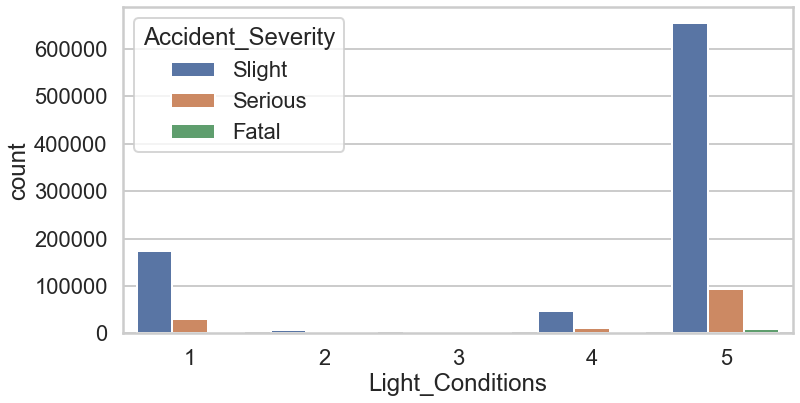

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x='Light_Conditions' , hue=  'Accident_Severity' , data=df);

**Observation**
The most of the accidents took place at condion 5 ie daylight and also the fatal accidents also took place in daylight.and then 
in darkness when lights were lit ie, at 1 .

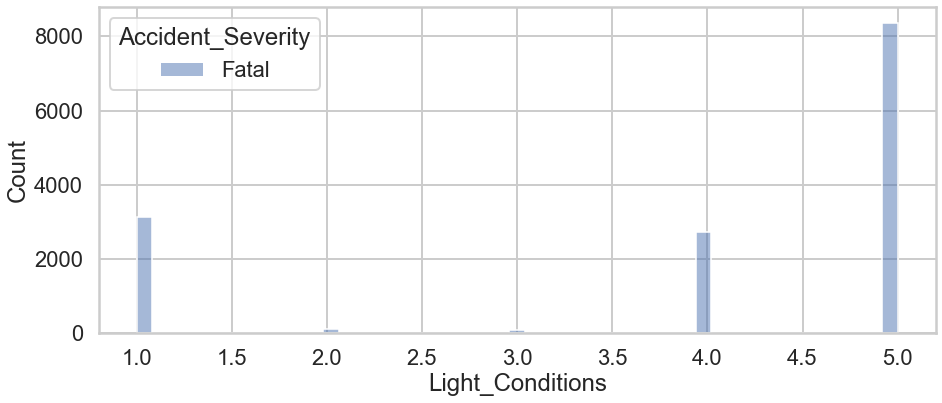

In [56]:
plt.figure(figsize=(15,6))
sns.histplot(x='Light_Conditions' , hue=  'Accident_Severity' , data=df_fatal);

## Feature Engineering

**Observation**  If we see on fatal data , that also shows more deaths in daylight ie, number  5 and in darkness when lights were 
lit. ie, at number 1. 

In [59]:
df['Casuality_GrpSize'] = ''
df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'].replace('', 'Solo')
df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'].replace('', 'couple')
df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=5), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=5), 'Casuality_GrpSize'].replace('', 'small_group')
df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'].replace('', 'Large FatalGroup')
df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'].replace('', 'Larger Group')
df.head(45)

,Accident_Index,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing,Hour,LightCategory,Casuality_GrpSize
0,200501BS00002,Slight,1.0,450.0,1.0,0.0,3.0,1,1.0,1.0,...,0,0,1,0,0,1,0,2,Darkness_Lights_On,Solo
1,200501BS00003,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,4.0,...,1,0,1,1,0,1,0,3,Darkness_Lights_On,Solo
2,200501BS00005,Slight,2.0,0.0,1.0,0.0,3.0,3,1.0,4.0,...,1,0,1,1,0,1,0,2,Darkness,Solo
3,200501BS00007,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,3.0,...,1,0,1,0,0,1,0,2,Darkness_Lights_On,Solo
4,200501BS00010,Slight,4.0,3212.0,3.0,304.0,3.0,4,1.0,1.0,...,0,0,1,0,0,1,0,2,Darkness_Lights_On,couple
5,200501BS00012,Slight,4.0,4.0,3.0,325.0,3.0,5,1.0,1.0,...,0,0,1,0,0,1,0,3,Darkness_Lights_On,Solo
6,200501BS00014,Slight,4.0,3220.0,4.0,308.0,3.0,6,1.0,1.0,...,0,0,1,0,0,1,0,2,Darkness_Lights_On,Solo
7,200501BS00016,Slight,4.0,3217.0,4.0,3216.0,3.0,6,1.0,3.0,...,0,0,1,0,0,1,0,4,Darkness_Lights_On,Solo
8,200501BS00019,Serious,2.0,0.0,1.0,0.0,3.0,2,1.0,3.0,...,1,0,1,0,0,1,0,3,Darkness_Lights_On,Solo
9,200501BS00021,Slight,1.0,302.0,1.0,0.0,3.0,7,1.0,4.0,...,1,0,1,1,0,1,0,2,Darkness_Lights_On,Solo


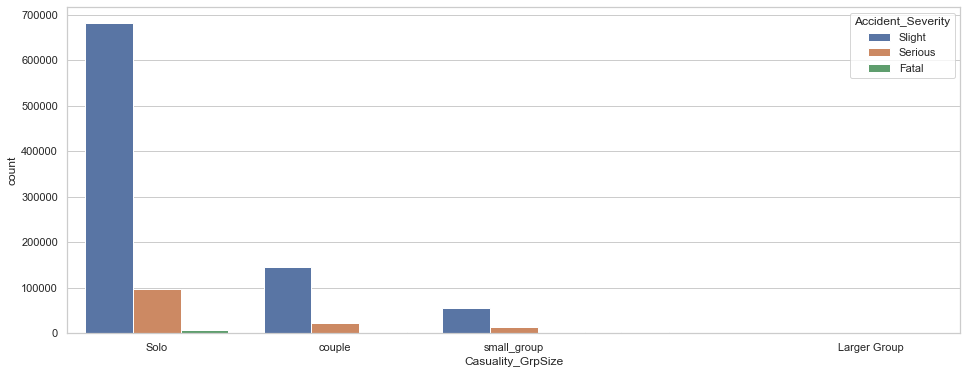

In [60]:
plt.figure(figsize=(16,6))
sns.set_theme(style="whitegrid")
sns.countplot(x="Casuality_GrpSize" , hue= 'Accident_Severity' , data=df);

### Creating a Separate DataFrame For Numerical and Categorical Features

In [61]:
Categorical_Features = df.select_dtypes('object').columns
Categorical_Features

Index(['Accident_Index', 'Accident_Severity', 'LightCategory',
       'Casuality_GrpSize'],
      dtype='object')

In [62]:
Numerical_Features = df.select_dtypes('number').columns
Numerical_Features

Index(['1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Carriageway_Hazards', 'Day_of_Week',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control',
       'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Year',
       'InScotland', '1st_Road_Class_missing', '2nd_Road_Class_missing',
       '2nd_Road_Number_missing', 'Carriageway_Hazards_missing',
       'Junction_Control_missing', 'LSOA_of_Accident_Location_missing',
       'Special_Conditions_at_Site_missing', 'Weath

In [63]:
Numerical_Features_new = Numerical_Features.drop(['1st_Road_Class_missing', '2nd_Road_Class_missing','2nd_Road_Number_missing',
                                'Carriageway_Hazards_missing', 'Junction_Control_missing', 'LSOA_of_Accident_Location_missing',
                                 'Special_Conditions_at_Site_missing', 'Weather_Conditions_missing', 'Junction_Detail', 
                                  'Did_Police_Officer_Attend_Scene_of_Accident', 'Pedestrian_Crossing-Human_Control', 'LSOA_of_Accident_Location_missing',
       'Special_Conditions_at_Site_missing' , 'Pedestrian_Crossing-Physical_Facilities']  )

Numerical_Features_new

Index(['1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Carriageway_Hazards', 'Day_of_Week',
       'Junction_Control', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Year', 'InScotland',
       'Hour'],
      dtype='object')

In [64]:
df_Category=df[Categorical_Features].copy()
df_Category

,Accident_Index,Accident_Severity,LightCategory,Casuality_GrpSize
0,200501BS00002,Slight,Darkness_Lights_On,Solo
1,200501BS00003,Slight,Darkness_Lights_On,Solo
2,200501BS00005,Slight,Darkness,Solo
3,200501BS00007,Slight,Darkness_Lights_On,Solo
4,200501BS00010,Slight,Darkness_Lights_On,couple
...,...,...,...,...
1037503,201091NM01760,Slight,DayLight,couple
1037504,201091NM01881,Slight,Darkness,Solo
1037505,201091NM01935,Slight,DayLight,Solo
1037506,201091NM01964,Serious,Darkness,Solo


In [65]:
df_num=df[Numerical_Features_new].copy()
df_num

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Junction_Control,Latitude,Light_Conditions,Local_Authority_(District),...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Hour
0,1.0,450.0,1.0,0.0,3.0,1,1.0,51.520075,1,1,...,1,1,1,3.0,30,1,1.0,2005,1,2
1,2.0,0.0,1.0,0.0,3.0,2,4.0,51.525301,1,1,...,1,1,2,2.0,30,1,1.0,2005,1,3
2,2.0,0.0,1.0,0.0,3.0,3,4.0,51.495752,2,1,...,1,2,2,4.0,30,1,1.0,2005,1,2
3,2.0,0.0,1.0,0.0,3.0,2,3.0,51.512695,1,1,...,1,1,2,2.0,30,1,1.0,2005,1,2
4,4.0,3212.0,3.0,304.0,3.0,4,1.0,51.483420,1,1,...,1,1,2,4.0,30,1,1.0,2005,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037503,4.0,95.0,1.0,0.0,4.0,2,7.0,57.374005,5,380,...,44,1,2,5.0,60,2,1.0,2010,2,4
1037504,4.0,95.0,1.0,0.0,4.0,5,7.0,57.232273,4,380,...,44,3,2,6.0,60,2,1.0,2010,2,3
1037505,4.0,96.0,1.0,0.0,3.0,6,3.0,57.585044,5,380,...,44,3,2,4.0,30,2,1.0,2010,2,1
1037506,4.0,9.0,1.0,0.0,3.0,6,3.0,57.214898,4,380,...,44,2,2,4.0,60,2,1.0,2010,2,2


In [66]:
df['Casuality_GrpSize'] = ''
df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'].replace('', 'Solo')
df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'].replace('', 'couple')
df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=7), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=7), 'Casuality_GrpSize'].replace('', 'small_group')
#df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'].replace('', 'Large FatalGroup')
df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'].replace('', 'Larger Group')
df.head(45)

,Accident_Index,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing,Hour,LightCategory,Casuality_GrpSize
0,200501BS00002,Slight,1.0,450.0,1.0,0.0,3.0,1,1.0,1.0,...,0,0,1,0,0,1,0,2,Darkness_Lights_On,Solo
1,200501BS00003,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,4.0,...,1,0,1,1,0,1,0,3,Darkness_Lights_On,Solo
2,200501BS00005,Slight,2.0,0.0,1.0,0.0,3.0,3,1.0,4.0,...,1,0,1,1,0,1,0,2,Darkness,Solo
3,200501BS00007,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,3.0,...,1,0,1,0,0,1,0,2,Darkness_Lights_On,Solo
4,200501BS00010,Slight,4.0,3212.0,3.0,304.0,3.0,4,1.0,1.0,...,0,0,1,0,0,1,0,2,Darkness_Lights_On,couple
5,200501BS00012,Slight,4.0,4.0,3.0,325.0,3.0,5,1.0,1.0,...,0,0,1,0,0,1,0,3,Darkness_Lights_On,Solo
6,200501BS00014,Slight,4.0,3220.0,4.0,308.0,3.0,6,1.0,1.0,...,0,0,1,0,0,1,0,2,Darkness_Lights_On,Solo
7,200501BS00016,Slight,4.0,3217.0,4.0,3216.0,3.0,6,1.0,3.0,...,0,0,1,0,0,1,0,4,Darkness_Lights_On,Solo
8,200501BS00019,Serious,2.0,0.0,1.0,0.0,3.0,2,1.0,3.0,...,1,0,1,0,0,1,0,3,Darkness_Lights_On,Solo
9,200501BS00021,Slight,1.0,302.0,1.0,0.0,3.0,7,1.0,4.0,...,1,0,1,1,0,1,0,2,Darkness_Lights_On,Solo


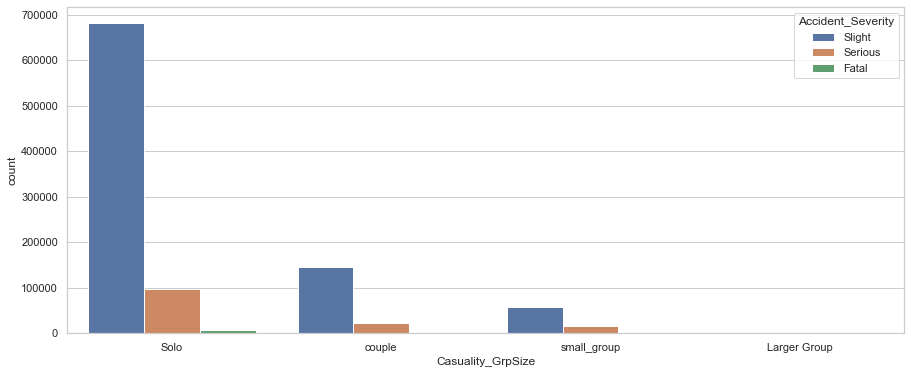

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(x="Casuality_GrpSize" ,hue="Accident_Severity", data=df);

In [68]:
df[(df['Casuality_GrpSize']=='Solo') & (df['1st_Road_Class']==1) & (df['Junction_Control']==1)& (df['Accident_Severity']=='Serious')]


,Accident_Index,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing,Hour,LightCategory,Casuality_GrpSize
322,200501CW10055,Serious,1.0,323.0,3.0,326.0,4.0,2,1.0,1.0,...,0,0,1,0,0,1,0,2,Darkness_Lights_On,Solo
703,200501CW11754,Serious,1.0,414.0,4.0,404.0,5.0,4,2.0,1.0,...,0,0,1,0,0,1,0,2,Darkness_Lights_On,Solo
959,200501EO40403,Serious,1.0,100.0,4.0,501.0,4.0,2,1.0,1.0,...,0,0,1,0,0,1,0,2,Darkness_Lights_On,Solo
1569,200501EO41118,Serious,1.0,509.0,3.0,507.0,3.0,7,1.0,1.0,...,0,0,1,0,0,0,0,2,DayLight,Solo
1687,200501EO41243,Serious,1.0,501.0,1.0,0.0,3.0,5,1.0,1.0,...,1,0,1,0,0,1,0,4,Darkness_Lights_On,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029474,2010550C38869,Serious,1.0,3068.0,1.0,0.0,5.0,5,1.0,1.0,...,1,0,1,0,0,1,0,1,DayLight,Solo
1030312,2010550D45505,Serious,1.0,3075.0,3.0,3070.0,4.0,4,1.0,1.0,...,0,0,1,0,0,1,0,1,DayLight,Solo
1032343,2.01061E+12,Serious,1.0,4246.0,1.0,283.0,4.0,7,1.0,1.0,...,0,0,1,0,0,1,0,2,Darkness,Solo
1035661,2.01062E+12,Serious,1.0,4290.0,1.0,0.0,4.0,3,1.0,1.0,...,1,0,1,0,0,1,0,1,DayLight,Solo


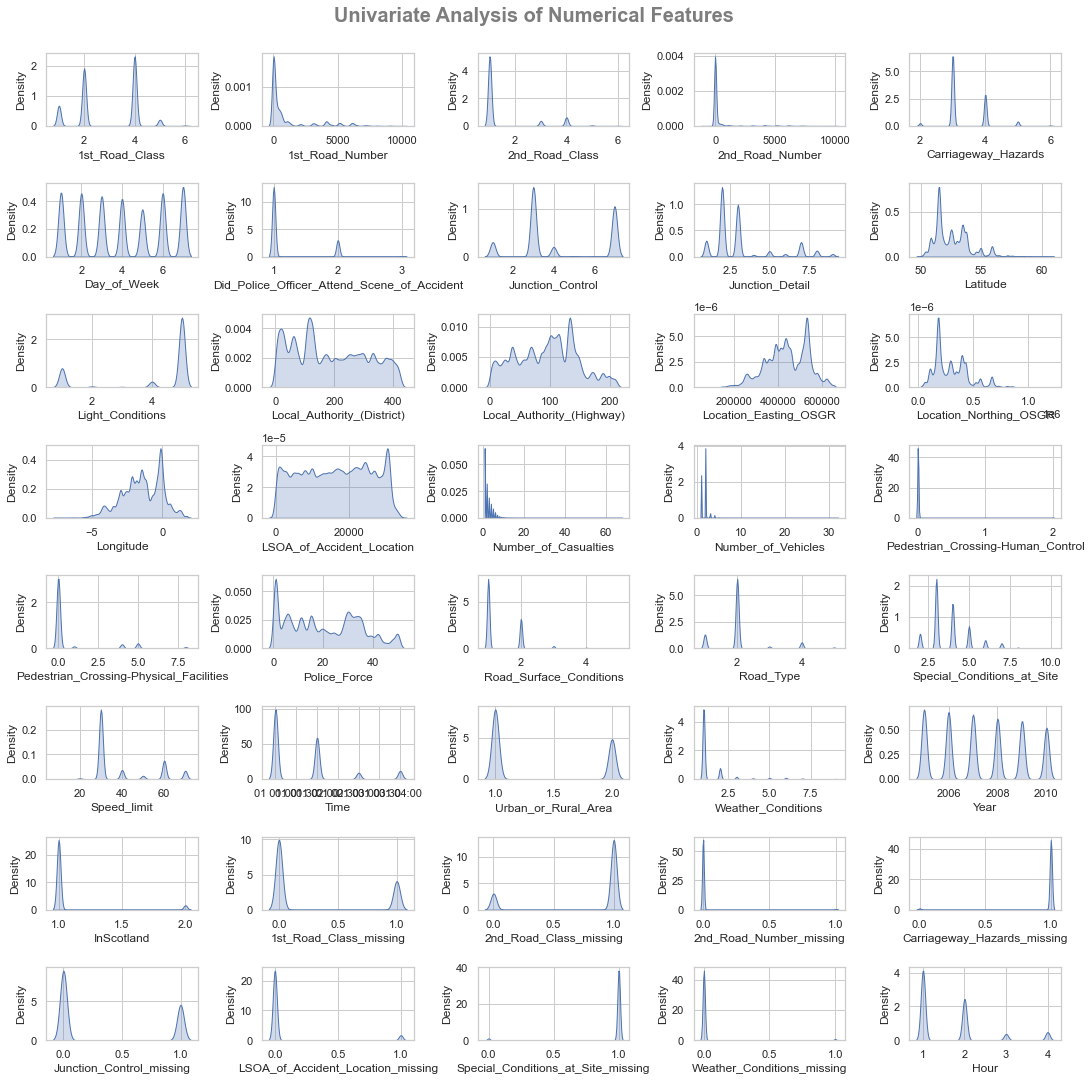

In [70]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.6, y=1.)
for i in range(0, len(numeric_features)):
    plt.subplot(8,5,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()